# Load_npyfile

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Wed Jan  6 08:56:59 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import random

In [4]:
path = "/content/drive/Shareddrives/CNN/"
table = pd.read_csv(path+"csv_files/finalDataset_2.csv", encoding="unicode_escape")
table_2 = pd.read_csv(path+"csv_files/flipkart_processed3.csv", encoding="unicode_escape")
table.tail()

,Unnamed: 0,index,label,label_num
21495,21495,21495,Pet Supplies(aug),19.0
21496,21496,21496,Pet Supplies(aug),19.0
21497,21497,21497,Pet Supplies(aug),19.0
21498,21498,21498,Pet Supplies(aug),19.0
21499,21499,21499,Pet Supplies(aug),19.0


In [5]:
x=np.load(path+"Resampled Np/finalDataset.npy")
y=np.array(table['label_num'])

In [ ]:
# x=np.load(path+"load_image/image_1.npy")
# y=np.load(path+"load_image/label_1.npy")

In [ ]:
# x=np.load(path+"load_image/new_X.npy")
# y=np.load(path+"load_image/label_all.npy")

In [ ]:
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(x.shape)
print(y.shape)

(21500, 256, 256, 3)
(21500,)


## Labels

In [ ]:
table_3 = pd.DataFrame(table['label'].unique())
table_3["labels_2"] = ['Home Furnishing', 'Footwear', 'Beauty and Personal Care',
       'Home Decor & Festive Needs', 'Automotive',
       'Mobiles & Accessories', 'Jewellery', 'Clothing',
       'Kitchen & Dining', '3C', 'Tools & Hardware',
       'Baby Care', 'Toys & School Supplies',
       'Pens & Stationery', 'Bags, Wallets & Belts',
       'Watches', 'Sports & Fitness',
       'Cameras & Accessories', 'Eyewear', 'Pet Supplies']
table_3.rename(columns={0:"lables_1"})

,lables_1,labels_2
0,Home Furnishing,Home Furnishing
1,Footwear,Footwear
2,Beauty and Personal Care,Beauty and Personal Care
3,Home Decor & Festive Needs,Home Decor & Festive Needs
4,Automotive,Automotive
5,Mobiles & Accessories,Mobiles & Accessories
6,Jewellery,Jewellery
7,Clothing,Clothing
8,Kitchen & Dining(aug),Kitchen & Dining
9,3C(aug),3C


In [ ]:
# for i in range(18446):
#   index = (np.where(table_2['labels'][i]==table_3['labels_2']))[0][0]
  # table_2.loc[i,'label_num']=int(index)

In [ ]:
# table_2.to_csv(path+"csv_files/flipkart_processed4.csv")

# Save_Images_as_npy

In [ ]:
def slicing_category_label(product_category_tree):
    labelList = product_category_tree.split(">>")
    i = 0
    while i<len(labelList):
        labelList[i] = labelList[i].strip().strip("[").strip("]").strip("\"")
        i += 1
    return labelList[0]
    # return labelList  # return this of all labels is needed

table['labels'] = table['product_category_tree'].apply(slicing_category_label)

In [ ]:
print(table.loc[2])

uniq_id                                     f449ec65dcbc041b6ae5e6a32717d01b
crawl_timestamp                                    2016-03-25 22:59:23 +0000
product_url                http://www.flipkart.com/aw-bellies/p/itmeh4grg...
product_name                                                      AW Bellies
product_category_tree      ["Footwear >> Women's Footwear >> Ballerinas >...
pid                                                         SHOEH4GRSUBJGZXE
retail_price                                                             999
discounted_price                                                         499
image                      ["http://img5a.flixcart.com/image/shoe/7/z/z/r...
is_FK_Advantage_product                                                False
description                Key Features of AW Bellies Sandals Wedges Heel...
product_rating                                           No rating available
overall_rating                                           No rating available

In [ ]:
nitems = len(table['labels'].unique())
nitems

265

In [ ]:
"""
X = []
Y = []
broken_image = set()
img = cv2.imread(path+ "image/"+str(0)+".jpg")

X.append(np.asarray(img))
X=np.asarray(X)

index = np.where((table['labels'][0]==table['labels'].unique()))
Y.append(index[0][0])
"""

In [ ]:
X.shape

(1, 256, 256, 3)

In [ ]:
"""
for i in range(1,5000):
    print(i)
    try:
        img = cv2.imread(path+ "image/"+str(i)+".jpg")
        img = np.expand_dims(img, axis=0)
        X = np.append( X , img , axis=0)
        index = np.where((table['labels'][i]==table['labels'].unique()))
        Y.append(index[0][0])
    except:
        # print("The %sth image is broken" % i)
        broken_image.add(i)
"""        

In [ ]:
"""
def load_image(start,end):
  X = []
  Y = []
  broken_image = set()
  img = cv2.imread(path+ "image/"+str(start)+".jpg")

  X.append(np.asarray(img))
  X=np.asarray(X)

  index = np.where((table['labels'][start]==table['labels'].unique()))
  Y.append(index[0][0])

  for i in range(start+1,end):
      print(i)
      try:
        img = cv2.imread(path+ "image/"+str(i)+".jpg")
        img = np.expand_dims(img, axis=0)
        X = np.append( X , img , axis=0)
        index = np.where((table['labels'][i]==table['labels'].unique()))
        Y.append(index[0][0])
      except:
        # print("The %sth image is broken" % i)
        broken_image.add(i)

  return X , np.array(Y)
"""       

In [ ]:
#X_2, Y_2 = load_image(5000,10000)

In [ ]:
#X_3, Y_3 = load_image(10001,15000)

In [ ]:
#X_4, Y_4 = load_image(15001,20000)

In [ ]:
print(len(X_4))
print(len(Y_4))

In [ ]:
X_4.shape

In [ ]:
Y_4.shape

In [ ]:
#np.save(path+"image_4.npy",X_4)
#np.save(path+"label_4.npy",Y_4)

In [ ]:
# X_1=np.load(path+"image_1.npy")
# X_2=np.load(path+"image_2.npy")
# X_3=np.load(path+"image_3.npy")
# X_4=np.load(path+"image_4.npy")


In [ ]:
# Y_1=np.load(path+"label_1.npy")
# Y_2=np.load(path+"label_2.npy")
# Y_3=np.load(path+"label_3.npy")
# Y_4=np.load(path+"label_4.npy")

In [ ]:
# X12 = np.append(X_1, X_2 , axis=0)
# X34 = np.append(X_3, X_4 , axis=0)
# X_all = np.append(X12, X34 , axis=0)

In [ ]:
# Y12 = np.append(Y_1, Y_2 , axis=0)
# Y34 = np.append(Y_3, Y_4 , axis=0)
# Y_all = np.append(Y12, Y34 , axis=0)

In [ ]:
# np.save(path+"image_all.npy",X_all)
# np.save(path+"label_all.npy",Y_all)

In [ ]:
# print(X_all.shape)
# print(Y_all.shape)

# Creat_Model_1
* https://www.kaggle.com/marlesson/building-a-recommendation-system-using-cnn

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import GlobalMaxPooling2D
tf.__version__

'2.4.0'

In [ ]:
# Input Shape
img_width, img_height, _ = x_test[0].shape

# Pre-Trained Model
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape = (img_width, img_height, 3))
base_model.trainable = False

# Add Layer Embedding
model = tf.keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 8, 8, 2048)        23587712  
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 2048)              0         
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


## Prediction

In [ ]:
def get_embedding(model, x):
    # Reshape
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)

In [ ]:
def predict(x,model):
  predict_list=[]
  #predict_list= np.array(predict_list)
  for i in range(x.shape[0]):
      predict_list.append(get_embedding(model, x[i]))

  return np.array(predict_list)

In [ ]:
predict_list = predict(x_test, model)

In [ ]:
predict_list = pd.DataFrame(predict_list)
predict_list.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,11.356071,7.822104,0.000000,9.749988,14.762697,0.805128,7.322790,2.893100,4.035911,1.240562,3.019061,4.774602,7.448378,0.000000,5.343312,0.000000,1.221198,3.284080,8.664027,8.524372,0.263760,11.571119,3.390219,4.483676,2.988033,3.010492,1.541125,0.000000,2.065016,4.132380,1.567398,16.751034,4.015817,17.537689,7.746406,8.443588,2.141917,5.310994,0.178668,0.953728,...,4.631099,0.000000,7.766762,0.000000,3.216118,2.309031,3.622025,1.832202,6.969701,2.170484,0.281316,3.614627,2.988418,1.500398,4.867449,0.536901,2.676455,0.000000,5.248232,12.799459,4.262594,1.722144,4.355765,0.000000,3.644826,10.354534,2.257317,0.000000,0.000000,6.015297,6.593057,4.367225,11.450931,16.123484,4.327211,1.868103,1.801358,2.179986,0.000000,5.836203
1,6.115753,6.713718,0.537028,9.828063,21.447809,4.454050,11.088875,7.228805,2.132566,1.463972,7.005887,0.046812,5.722725,0.374519,5.160179,9.660507,0.010280,6.684154,0.000000,5.841611,0.803943,3.963309,3.056608,2.692879,1.577888,3.327864,8.402314,10.377748,1.249882,6.374284,3.036126,16.932194,0.706932,1.744283,13.169413,17.060497,40.434959,7.423285,2.497338,11.784410,...,7.035773,5.569961,4.451208,1.250018,6.340679,5.480134,5.492022,3.298187,3.928484,5.140259,8.166809,0.000000,8.431258,3.732060,7.458988,3.039910,2.070011,2.754500,1.514265,9.401478,3.999078,4.332878,5.814672,2.611667,2.672519,3.114671,1.194932,0.568629,1.570329,20.965290,0.145600,5.333401,10.275278,15.236789,2.030399,2.752306,4.469076,2.404296,5.303100,7.394410
2,9.147728,15.203727,5.481087,0.229346,9.468309,5.104947,4.665511,3.812917,0.000000,4.018185,2.812447,25.363579,12.313322,6.070526,4.051694,0.832355,0.000000,2.019339,8.305998,8.637012,5.016991,5.168679,7.001278,0.933439,16.421120,3.746328,7.560397,0.854893,12.891071,4.651205,5.664304,9.070856,13.116961,6.173979,8.834847,3.366711,1.317969,11.251940,5.193276,3.888612,...,21.455257,0.246004,2.929864,8.542595,4.453939,28.144596,1.046159,13.586630,0.000000,10.750206,0.000000,5.207004,0.122507,1.326251,8.483885,3.073758,0.166088,0.322582,0.133006,5.120410,3.705062,5.525525,6.732005,2.750416,9.373192,1.007709,0.000000,12.434237,0.000000,3.175388,2.027036,0.957613,10.908884,9.070514,8.506433,8.527035,5.643750,8.377359,4.672834,16.770288
3,4.543557,20.562939,1.988542,2.912635,14.148108,0.000000,2.967749,3.020384,1.115939,0.000000,11.956800,14.957388,5.876882,1.556596,14.555677,0.000000,1.578006,4.426030,7.996435,1.078895,5.781686,17.780809,23.232903,2.558552,3.814842,2.175879,0.408207,6.737235,4.726193,1.655343,2.471826,16.434689,7.077216,6.109484,12.089596,9.600329,5.486522,9.170008,0.000000,0.950951,...,4.830381,0.934809,9.352052,5.843218,2.000457,10.900095,1.151121,1.140672,0.831136,0.095819,5.494757,3.958426,1.305969,4.183338,0.000000,0.000000,4.548472,4.273571,3.214142,9.019421,1.375980,0.061697,1.616471,0.000000,1.578828,6.840302,0.000000,3.493400,2.087224,11.161265,2.045796,2.785279,4.511032,21.200626,4.121695,1.729910,11.463027,1.036735,1.263895,2.901337
4,1.569238,6.997043,2.956838,2.780749,0.679283,1.766192,8.389862,14.307302,2.680544,6.104331,2.321881,16.687525,8.014873,3.927558,0.453951,1.155727,0.000000,0.000000,2.049421,20.996958,11.618380,0.638936,7.525536,3.543664,12.841928,1.268135,0.219681,0.663624,3.726353,3.995330,0.557966,2.581894,3.384057,0.612162,7.471586,1.532877,1.951602,9.562219,1.773988,6.075942,...,0.617134,0.556342,0.000000,7.539008,0.000000,0.000000,0.000000,0.000000,0.191612,8.308557,4.601701,5.791425,18.216927,2.279025,28.996834,6.458891,3.177282,2.857127,27.154226,0.322840,2.328761,7.603687,0.000000,1.161075,0.000000,7.592088,2.542215,1.116000,3.969439,23.586523,4.465411,0.000000,6.390871,2.138586,13.508257,0.132902,18.918264,0.495602,5.312943,7.4568

In [ ]:
predict_list = model.predict(preprocess_input(x_test))
predict_list = pd.DataFrame(predict_list)
predict_list.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,11.356111,7.822097,0.000000,9.750013,14.762691,0.805119,7.322792,2.893051,4.035889,1.240586,3.019085,4.774608,7.448401,0.000000,5.343292,0.000000,1.221200,3.284077,8.664008,8.524357,0.263772,11.571114,3.390233,4.483675,2.988031,3.010519,1.541146,0.000000,2.065002,4.132409,1.567388,16.751040,4.015826,17.537647,7.746390,8.443580,2.141888,5.311002,0.178667,0.953737,...,4.631080,0.000000,7.766763,0.000000,3.216134,2.309019,3.622011,1.832186,6.969680,2.170472,0.281337,3.614614,2.988410,1.500408,4.867445,0.536906,2.676463,0.000000,5.248228,12.799414,4.262597,1.722145,4.355767,0.000000,3.644824,10.354518,2.257333,0.000000,0.000000,6.015285,6.593052,4.367228,11.450911,16.123438,4.327216,1.868110,1.801343,2.179975,0.000000,5.836204
1,6.115764,6.713704,0.537014,9.828092,21.447826,4.454073,11.088901,7.228811,2.132579,1.463943,7.005900,0.046817,5.722703,0.374496,5.160184,9.660524,0.010284,6.684157,0.000000,5.841625,0.803972,3.963313,3.056601,2.692877,1.577900,3.327857,8.402312,10.377769,1.249896,6.374276,3.036139,16.932211,0.706923,1.744311,13.169428,17.060520,40.434921,7.423264,2.497357,11.784504,...,7.035776,5.569970,4.451186,1.250021,6.340691,5.480125,5.492049,3.298191,3.928473,5.140247,8.166815,0.000000,8.431263,3.732079,7.459018,3.039919,2.069987,2.754497,1.514278,9.401509,3.999098,4.332865,5.814682,2.611687,2.672504,3.114645,1.194976,0.568646,1.570338,20.965298,0.145597,5.333414,10.275298,15.236783,2.030448,2.752312,4.469092,2.404303,5.303119,7.394418
2,9.147732,15.203760,5.481101,0.229368,9.468349,5.104961,4.665514,3.812906,0.000000,4.018170,2.812418,25.363544,12.313334,6.070545,4.051702,0.832344,0.000000,2.019336,8.306007,8.637014,5.016993,5.168634,7.001299,0.933429,16.421116,3.746345,7.560391,0.854908,12.891045,4.651169,5.664328,9.070854,13.116974,6.174044,8.834784,3.366704,1.317996,11.251907,5.193270,3.888623,...,21.455248,0.246023,2.929888,8.542605,4.453954,28.144604,1.046167,13.586631,0.000000,10.750234,0.000000,5.207004,0.122544,1.326220,8.483885,3.073763,0.166089,0.322585,0.132985,5.120383,3.705062,5.525518,6.731985,2.750427,9.373137,1.007686,0.000000,12.434245,0.000000,3.175447,2.027030,0.957620,10.908839,9.070524,8.506454,8.527026,5.643772,8.377359,4.672844,16.770288
3,4.543551,20.562984,1.988561,2.912628,14.148124,0.000000,2.967752,3.020372,1.115936,0.000000,11.956806,14.957417,5.876897,1.556607,14.555687,0.000000,1.578002,4.425992,7.996449,1.078866,5.781672,17.780819,23.232878,2.558549,3.814816,2.175870,0.408209,6.737223,4.726208,1.655348,2.471823,16.434681,7.077224,6.109489,12.089647,9.600334,5.486510,9.170022,0.000000,0.950961,...,4.830386,0.934828,9.352051,5.843246,2.000465,10.900139,1.151160,1.140688,0.831117,0.095825,5.494786,3.958485,1.305955,4.183362,0.000000,0.000000,4.548492,4.273596,3.214178,9.019462,1.375995,0.061726,1.616469,0.000000,1.578826,6.840319,0.000000,3.493432,2.087253,11.161277,2.045752,2.785288,4.511058,21.200687,4.121681,1.729918,11.463030,1.036744,1.263887,2.901309
4,1.569246,6.997055,2.956836,2.780745,0.679264,1.766195,8.389844,14.307320,2.680538,6.104338,2.321888,16.687517,8.014890,3.927565,0.453963,1.155773,0.000000,0.000000,2.049423,20.996950,11.618331,0.638943,7.525528,3.543669,12.841900,1.268116,0.219688,0.663622,3.726358,3.995345,0.557973,2.581887,3.384048,0.612159,7.471621,1.532887,1.951602,9.562207,1.773991,6.075951,...,0.617148,0.556335,0.000000,7.539019,0.000000,0.000000,0.000000,0.000000,0.191608,8.308599,4.601704,5.791432,18.216917,2.279025,28.996849,6.458858,3.177282,2.857128,27.154221,0.322837,2.328770,7.603673,0.000000,1.161086,0.000000,7.592102,2.542226,1.116001,3.969429,23.586510,4.465388,0.000000,6.390851,2.138544,13.508224,0.132918,18.918251,0.495609,5.312961,7.4568

In [ ]:
len(predict_list)

919

In [ ]:
predict_list['y_test']=y_test

In [ ]:
predict_list.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,tsne-2d-one,tsne-2d-two,y_test
0,11.356111,7.822097,0.000000,9.750013,14.762691,0.805119,7.322792,2.893051,4.035889,1.240586,3.019085,4.774608,7.448401,0.000000,5.343292,0.000000,1.221200,3.284077,8.664008,8.524357,0.263772,11.571114,3.390233,4.483675,2.988031,3.010519,1.541146,0.000000,2.065002,4.132409,1.567388,16.751040,4.015826,17.537647,7.746390,8.443580,2.141888,5.311002,0.178667,0.953737,...,0.000000,3.216134,2.309019,3.622011,1.832186,6.969680,2.170472,0.281337,3.614614,2.988410,1.500408,4.867445,0.536906,2.676463,0.000000,5.248228,12.799414,4.262597,1.722145,4.355767,0.000000,3.644824,10.354518,2.257333,0.000000,0.000000,6.015285,6.593052,4.367228,11.450911,16.123438,4.327216,1.868110,1.801343,2.179975,0.000000,5.836204,5.937102,9.491397,0
1,6.115764,6.713704,0.537014,9.828092,21.447826,4.454073,11.088901,7.228811,2.132579,1.463943,7.005900,0.046817,5.722703,0.374496,5.160184,9.660524,0.010284,6.684157,0.000000,5.841625,0.803972,3.963313,3.056601,2.692877,1.577900,3.327857,8.402312,10.377769,1.249896,6.374276,3.036139,16.932211,0.706923,1.744311,13.169428,17.060520,40.434921,7.423264,2.497357,11.784504,...,1.250021,6.340691,5.480125,5.492049,3.298191,3.928473,5.140247,8.166815,0.000000,8.431263,3.732079,7.459018,3.039919,2.069987,2.754497,1.514278,9.401509,3.999098,4.332865,5.814682,2.611687,2.672504,3.114645,1.194976,0.568646,1.570338,20.965298,0.145597,5.333414,10.275298,15.236783,2.030448,2.752312,4.469092,2.404303,5.303119,7.394418,-18.374691,-7.054824,46
2,9.147732,15.203760,5.481101,0.229368,9.468349,5.104961,4.665514,3.812906,0.000000,4.018170,2.812418,25.363544,12.313334,6.070545,4.051702,0.832344,0.000000,2.019336,8.306007,8.637014,5.016993,5.168634,7.001299,0.933429,16.421116,3.746345,7.560391,0.854908,12.891045,4.651169,5.664328,9.070854,13.116974,6.174044,8.834784,3.366704,1.317996,11.251907,5.193270,3.888623,...,8.542605,4.453954,28.144604,1.046167,13.586631,0.000000,10.750234,0.000000,5.207004,0.122544,1.326220,8.483885,3.073763,0.166089,0.322585,0.132985,5.120383,3.705062,5.525518,6.731985,2.750427,9.373137,1.007686,0.000000,12.434245,0.000000,3.175447,2.027030,0.957620,10.908839,9.070524,8.506454,8.527026,5.643772,8.377359,4.672844,16.770288,-6.746017,10.071214,46
3,4.543551,20.562984,1.988561,2.912628,14.148124,0.000000,2.967752,3.020372,1.115936,0.000000,11.956806,14.957417,5.876897,1.556607,14.555687,0.000000,1.578002,4.425992,7.996449,1.078866,5.781672,17.780819,23.232878,2.558549,3.814816,2.175870,0.408209,6.737223,4.726208,1.655348,2.471823,16.434681,7.077224,6.109489,12.089647,9.600334,5.486510,9.170022,0.000000,0.950961,...,5.843246,2.000465,10.900139,1.151160,1.140688,0.831117,0.095825,5.494786,3.958485,1.305955,4.183362,0.000000,0.000000,4.548492,4.273596,3.214178,9.019462,1.375995,0.061726,1.616469,0.000000,1.578826,6.840319,0.000000,3.493432,2.087253,11.161277,2.045752,2.785288,4.511058,21.200687,4.121681,1.729918,11.463030,1.036744,1.263887,2.901309,0.645048,14.068352,0
4,1.569246,6.997055,2.956836,2.780745,0.679264,1.766195,8.389844,14.307320,2.680538,6.104338,2.321888,16.687517,8.014890,3.927565,0.453963,1.155773,0.000000,0.000000,2.049423,20.996950,11.618331,0.638943,7.525528,3.543669,12.841900,1.268116,0.219688,0.663622,3.726358,3.995345,0.557973,2.581887,3.384048,0.612159,7.471621,1.532887,1.951602,9.562207,1.773991,6.075951,...,7.539019,0.000000,0.000000,0.000000,0.000000,0.191608,8.308599,4.601704,5.791432,18.216917,2.279025,28.996849,6.458858,3.177282,2.857128,27.154221,0.322837,2.328770,7.603673,0.000000,1.161086,0.000000,7.592102,2.542226,1.116001,3.969429,23.586510,4.465388,0.000000,6.390851,2.138544,13.508224,0.132918,18.918251,0.495609,5.312961,7.456873,9.815563,-8.012019,7


In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# Calcule DIstance Matriz
cosine_sim = 1-pairwise_distances(predict_list, metric='cosine')
cosine_sim[:4, :4]

array([[1.        , 0.64779712, 0.58355664, 0.72263808],
       [0.64779712, 1.        , 0.55886195, 0.65372014],
       [0.58355664, 0.55886195, 1.        , 0.60591957],
       [0.72263808, 0.65372014, 0.60591957, 1.        ]])

## Get_recommdation

In [ ]:
indices = pd.Series(range(len(x_test)))
indices

# Function that get movie recommendations based on the cosine similarity score of movie genres
def get_recommender(idx, top_n = 5):
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    
    return indices.iloc[idx_rec].index, idx_sim

get_recommender(29, top_n = 5)

(Int64Index([144, 175, 582, 11, 520], dtype='int64'),
 [0.7515563159344502,
  0.7354923014543573,
  0.7118171863172883,
  0.6472103755286409,
  0.6294407786886688])

In [ ]:
img = x_test[29]

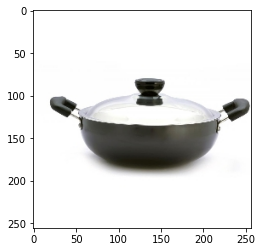

In [ ]:
plt.imshow(cv2.cvtColor(np.array(img,dtype="uint8"),cv2.COLOR_BGR2RGB))

In [ ]:
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(figures[title])
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional

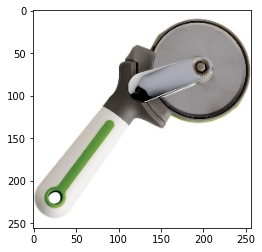

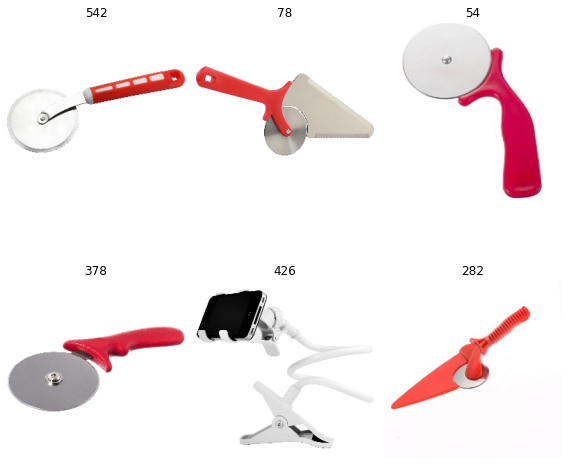

In [ ]:
# Idx Item to Recommender
idx_ref = 520

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, top_n = 6)

# Plot
#===================
 
plt.imshow(cv2.cvtColor(np.array(x_test[idx_ref],dtype="uint8"),cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {str(i): cv2.cvtColor(np.array(x_test[i],dtype="uint8"),cv2.COLOR_BGR2RGB) for i in idx_rec}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

## TSNE

In [ ]:
from sklearn.manifold import TSNE
import time
import seaborn as sns

In [ ]:
## 找lable數大於10的物品畫圖
predict_label = list(predict_list['y_test'].value_counts().index[0:11])
predict_max = predict_list['y_test'].isin(predict_label)

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(predict_list[])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 5.243569374084473 seconds


In [ ]:
predict_list['tsne-2d-one'] = tsne_results[:,0]
predict_list['tsne-2d-two'] = tsne_results[:,1]

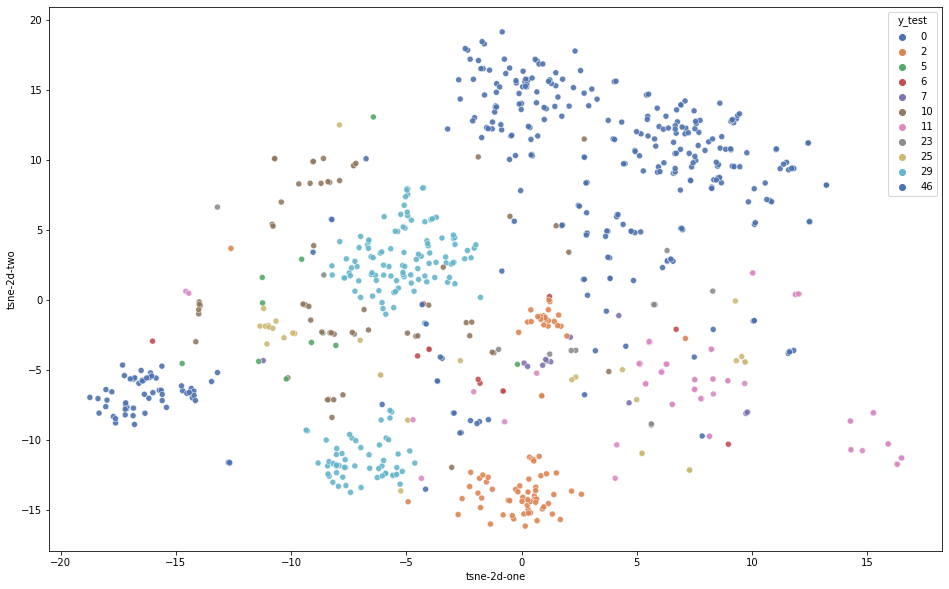

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",
                hue="y_test",
                data=predict_list[predict_max],
                 palette="deep",
                legend="full",
                alpha=0.9)

# Creat_Model_2
* https://github.com/AdrianUng/keras-triplet-loss-mnist/blob/master/Triplet_loss_KERAS_semi_hard_from_TF.ipynb

In [6]:
## for Model definition/training
from keras.models import Model, load_model
from keras.layers import Input, Flatten, Dense, concatenate,  Dropout
from keras.optimizers import Adam

from keras.utils import plot_model
from keras.callbacks import ModelCheckpoint

## required for semi-hard triplet loss:
from tensorflow.python.ops import array_ops
from tensorflow.python.ops import math_ops
from tensorflow.python.framework import dtypes
import tensorflow as tf

## for visualizing 
import matplotlib.pyplot as plt, numpy as np
from sklearn.decomposition import PCA

In [7]:
def pairwise_distance(feature, squared=False):
    """Computes the pairwise distance matrix with numerical stability.

    output[i, j] = || feature[i, :] - feature[j, :] ||_2

    Args:
      feature: 2-D Tensor of size [number of data, feature dimension].
      squared: Boolean, whether or not to square the pairwise distances.

    Returns:
      pairwise_distances: 2-D Tensor of size [number of data, number of data].
    """
    pairwise_distances_squared = math_ops.add(
        math_ops.reduce_sum(math_ops.square(feature), axis=[1], keepdims=True),
        math_ops.reduce_sum(
            math_ops.square(array_ops.transpose(feature)),
            axis=[0],
            keepdims=True)) - 2.0 * math_ops.matmul(feature,
                                                    array_ops.transpose(feature))

    # Deal with numerical inaccuracies. Set small negatives to zero.
    pairwise_distances_squared = math_ops.maximum(pairwise_distances_squared, 0.0)
    # Get the mask where the zero distances are at.
    error_mask = math_ops.less_equal(pairwise_distances_squared, 0.0)

    # Optionally take the sqrt.
    if squared:
        pairwise_distances = pairwise_distances_squared
    else:
        pairwise_distances = math_ops.sqrt(
            pairwise_distances_squared + math_ops.to_float(error_mask) * 1e-16)

    # Undo conditionally adding 1e-16.
    pairwise_distances = math_ops.multiply(
        pairwise_distances, math_ops.to_float(math_ops.logical_not(error_mask)))

    num_data = array_ops.shape(feature)[0]
    # Explicitly set diagonals to zero.
    mask_offdiagonals = array_ops.ones_like(pairwise_distances) - array_ops.diag(
        array_ops.ones([num_data]))
    pairwise_distances = math_ops.multiply(pairwise_distances, mask_offdiagonals)
    return pairwise_distances
def masked_maximum(data, mask, dim=1):
    """Computes the axis wise maximum over chosen elements.

    Args:
      data: 2-D float `Tensor` of size [n, m].
      mask: 2-D Boolean `Tensor` of size [n, m].
      dim: The dimension over which to compute the maximum.

    Returns:
      masked_maximums: N-D `Tensor`.
        The maximized dimension is of size 1 after the operation.
    """
    axis_minimums = math_ops.reduce_min(data, dim, keepdims=True)
    masked_maximums = math_ops.reduce_max(
        math_ops.multiply(data - axis_minimums, mask), dim,
        keepdims=True) + axis_minimums
    return masked_maximums

def masked_minimum(data, mask, dim=1):
    """Computes the axis wise minimum over chosen elements.

    Args:
      data: 2-D float `Tensor` of size [n, m].
      mask: 2-D Boolean `Tensor` of size [n, m].
      dim: The dimension over which to compute the minimum.

    Returns:
      masked_minimums: N-D `Tensor`.
        The minimized dimension is of size 1 after the operation.
    """
    axis_maximums = math_ops.reduce_max(data, dim, keepdims=True)
    masked_minimums = math_ops.reduce_min(
        math_ops.multiply(data - axis_maximums, mask), dim,
        keepdims=True) + axis_maximums
    return masked_minimums

In [8]:
def triplet_loss_adapted_from_tf(y_true, y_pred):
    del y_true
    margin = 1.
    labels = y_pred[:, :1]

 
    labels = tf.cast(labels, dtype='int32')

    embeddings = y_pred[:, 1:]

    ### Code from Tensorflow function [tf.contrib.losses.metric_learning.triplet_semihard_loss] starts here:
    
    # Reshape [batch_size] label tensor to a [batch_size, 1] label tensor.
    # lshape=array_ops.shape(labels)
    # assert lshape.shape == 1
    # labels = array_ops.reshape(labels, [lshape[0], 1])

    # Build pairwise squared distance matrix.
    pdist_matrix = pairwise_distance(embeddings, squared=True)
    # Build pairwise binary adjacency matrix.
    adjacency = math_ops.equal(labels, array_ops.transpose(labels))
    # Invert so we can select negatives only.
    adjacency_not = math_ops.logical_not(adjacency)

    # global batch_size  
    batch_size = array_ops.size(labels) # was 'array_ops.size(labels)'

    # Compute the mask.
    pdist_matrix_tile = array_ops.tile(pdist_matrix, [batch_size, 1])
    mask = math_ops.logical_and(
        array_ops.tile(adjacency_not, [batch_size, 1]),
        math_ops.greater(
            pdist_matrix_tile, array_ops.reshape(
                array_ops.transpose(pdist_matrix), [-1, 1])))
    mask_final = array_ops.reshape(
        math_ops.greater(
            math_ops.reduce_sum(
                math_ops.cast(mask, dtype=dtypes.float32), 1, keepdims=True),
            0.0), [batch_size, batch_size])
    mask_final = array_ops.transpose(mask_final)

    adjacency_not = math_ops.cast(adjacency_not, dtype=dtypes.float32)
    mask = math_ops.cast(mask, dtype=dtypes.float32)

    # negatives_outside: smallest D_an where D_an > D_ap.
    negatives_outside = array_ops.reshape(
        masked_minimum(pdist_matrix_tile, mask), [batch_size, batch_size])
    negatives_outside = array_ops.transpose(negatives_outside)

    # negatives_inside: largest D_an.
    negatives_inside = array_ops.tile(
        masked_maximum(pdist_matrix, adjacency_not), [1, batch_size])
    semi_hard_negatives = array_ops.where(
        mask_final, negatives_outside, negatives_inside)

    loss_mat = math_ops.add(margin, pdist_matrix - semi_hard_negatives)

    mask_positives = math_ops.cast(
        adjacency, dtype=dtypes.float32) - array_ops.diag(
        array_ops.ones([batch_size]))

    # In lifted-struct, the authors multiply 0.5 for upper triangular
    #   in semihard, they take all positive pairs except the diagonal.
    num_positives = math_ops.reduce_sum(mask_positives)

    semi_hard_triplet_loss_distance = math_ops.truediv(
        math_ops.reduce_sum(
            math_ops.maximum(
                math_ops.multiply(loss_mat, mask_positives), 0.0)),
        num_positives,
        name='triplet_semihard_loss')
    
    ### Code from Tensorflow function semi-hard triplet loss ENDS here.
    return semi_hard_triplet_loss_distance

In [9]:
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D

# https://vimsky.com/zh-tw/examples/detail/python-method-keras.applications.resnet50.ResNet50.html
def create_base_network(image_input_shape, embedding_size):
    input_tensor = Input(shape=image_input_shape, name="input")

    model = ResNet50(weights='imagenet', include_top= False , 
                input_tensor=input_tensor,
                input_shape=None,)
    
    x = model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(embedding_size)(x)

    base_network = Model(inputs=input_tensor, outputs=x)
    # plot_model(base_network, to_file=path+'base_network.png', show_shapes=True, show_layer_names=True)
    return base_network


In [10]:
from sklearn.model_selection import train_test_split
if __name__ == "__main__":
    # in case this scriot is called from another file, let's make sure it doesn't start training the network...

    batch_size = 30
    epochs = 30
    train_flag = True  # either     True or False

    embedding_size = 128

    no_of_components = 2  # for visualization -> PCA.fit_transform()

    step = 10

    # The data, split between train and test sets
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

    input_image_shape = x[0].shape

def generator(X_data, y_data, batch_size):

  samples_per_epoch = X_data.shape[0]
  number_of_batches = samples_per_epoch/batch_size
  counter=0

  while 1:

    X_batch = np.array(X_data[batch_size*counter:batch_size*(counter+1)]).astype('float32')
    X_batch = X_batch/255 
    y_batch = np.array(y_data[batch_size*counter:batch_size*(counter+1)]).astype('float32')

    dummy_gt_train = np.zeros((len(X_batch), embedding_size + 1))

    counter += 1
    yield [X_batch,y_batch], dummy_gt_train

    #restart counter to yeild data in the next epoch as well
    if counter >= number_of_batches:
        counter = 0


In [13]:
# Network training...
if train_flag == True:

    base_network = create_base_network(input_image_shape, embedding_size)

    input_images = Input(shape=input_image_shape, name='input_image') # input layer for images
    input_labels = Input(shape=(1,), name='input_label')    # input layer for labels
    embeddings = base_network([input_images])               # output of network -> embeddings
    labels_plus_embeddings = concatenate([input_labels, embeddings])  # concatenating the labels + embeddings

    # Defining a model with inputs (images, labels) and outputs (labels_plus_embeddings)
    model = Model(inputs=[input_images, input_labels],
                  outputs=labels_plus_embeddings)

    model.summary()
    # plot_model(model, to_file=path+'model.png', show_shapes=True, show_layer_names=True)

    # train session
    opt = Adam(lr=0.00001)  # choose optimiser. RMS is good too!

    model.compile(loss=triplet_loss_adapted_from_tf,
                  optimizer=opt)

    filepath = "semiH_trip_MNIST_v13_ep{epoch:02d}_BS%d.hdf5"% batch_size
    checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, period=25)
    callbacks_list = [checkpoint]

    # Uses 'dummy' embeddings + dummy gt labels. Will be removed as soon as loaded, to free memory
    # dummy_gt_train = np.zeros((len(x_train), embedding_size + 1))
    # dummy_gt_val = np.zeros((len(x_val), embedding_size + 1))

    # x_train = np.reshape(x_train, (len(x_train), x_train.shape[1], x_train.shape[1], 3))
    # x_val = np.reshape(x_val, (len(x_val), x_train.shape[1], x_train.shape[1], 3))

    """
    H = model.fit(
        x=[x_train,y_train],
        y=dummy_gt_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=([x_val, y_val], dummy_gt_val),
        callbacks=callbacks_list)
    """

    #Train the model using generator vs using the full batch
    H = model.fit(
    generator(x_train, y_train, batch_size),
    epochs=epochs,
    steps_per_epoch = x.shape[0]/batch_size,
    validation_data = generator(x_test[:500,:,:,:], y_test[:500], batch_size*2),
    validation_steps = x.shape[0]/batch_size*2,
    callbacks=callbacks_list
    )
        
    plt.figure(figsize=(8,8))
    plt.plot(H.history['loss'], label='training loss')
    plt.plot(H.history['val_loss'], label='validation loss')
    plt.legend()
    plt.title('Train/validation loss')
    plt.show()
else:

        #####
    model = load_model(path+'1_2_3.h5', #compile=False)
         custom_objects={'triplet_loss_adapted_from_tf':triplet_loss_adapted_from_tf})

In [ ]:
# model.save(path+'1_2_3.h5')

## Prediction

In [14]:
x=np.load(path+"load_image/new_X.npy")
model = load_model(path+'1_2_3.h5', compile=False)

NameError: ignored

In [13]:
def get_embedding(model, x):
    # Reshape
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = (x/255).astype('float32')
    return model.predict(x).reshape(-1)

def predict(x,model):
  predict_list=[]
  #predict_list= np.array(predict_list)
  for i in range(x.shape[0]):
      predict_list.append(get_embedding(model, x[i]))

  return np.array(predict_list)

# Test the network
# creating an empty network
testing_embeddings = create_base_network(input_image_shape,embedding_size=embedding_size)

# Grabbing the weights from the trained network
for layer_target, layer_source in zip(testing_embeddings.layers, model.layers[2].layers):
    weights = layer_source.get_weights()
    layer_target.set_weights(weights)
    del weights

94773248/94765736 [==============================] - 1s 0us/step


In [14]:
x_embeddings = predict(x, testing_embeddings)  
x_embeddings = pd.DataFrame(x_embeddings)
x_embeddings.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,-0.459146,-2.353053,-0.653216,-0.469187,-0.800393,1.977388,0.092098,-0.705649,1.688268,0.019460,2.703753,-0.405712,2.030756,1.992401,-0.200400,0.562903,-0.423863,1.352899,1.335039,-1.218056,-0.448396,-2.956022,1.470864,-0.318800,-1.241655,0.213500,-0.462620,-1.657572,0.696245,-2.322785,2.735523,-0.490149,-0.215416,1.519412,0.802365,-0.090670,0.012502,0.898060,-0.675439,0.769099,...,-0.762075,0.738832,-0.709255,-1.358269,0.973017,-3.386129,-2.435107,-1.267386,-0.649739,-1.888998,-0.149451,1.592216,-0.764780,-0.447132,-1.529859,-1.662040,2.251708,5.658563,0.630590,1.094702,0.816459,2.181031,-1.949548,-2.888702,1.691729,0.846767,2.303129,0.887146,-0.212623,2.439907,0.793543,-1.225766,-0.505801,1.673417,1.003085,-3.113788,2.944354,-1.663992,1.321238,0.235743
1,-0.056821,0.492540,0.493598,-1.096264,0.755114,0.780929,0.526098,0.606618,-0.305984,0.152015,-0.140636,0.083326,0.153164,1.742146,-0.844690,1.698652,-1.058540,-0.496548,0.203407,-0.223035,0.830752,1.677175,-0.138311,-1.480933,-1.551271,-0.532464,-0.141736,-1.154357,1.042752,-1.447945,-0.021581,-1.319659,-0.798807,-0.878061,-0.218229,-1.049600,-0.400514,0.466998,0.572356,0.718806,...,0.667935,0.920505,-1.091170,0.540955,-0.895577,-1.510933,0.574513,-1.409256,-1.879297,1.288636,2.014634,1.598155,0.806392,-1.505249,-0.905058,-1.005879,-0.037853,2.100536,-0.481637,0.108251,0.460666,-0.536076,-2.177181,0.370760,-0.208752,-0.377678,-0.912817,-0.514819,-2.020185,1.141746,-0.042532,-1.804173,-0.047603,-0.411776,1.007070,-0.030769,0.750946,-0.523083,0.321748,-1.397079
2,1.204086,-1.563397,2.032578,-2.665294,1.303529,0.055850,0.778526,1.771732,-0.796433,-1.099856,0.392505,-0.088886,1.439267,0.299553,-1.005435,1.074861,0.485964,-0.516296,-0.736270,-1.856400,3.046297,-0.721144,0.064738,-1.487788,-1.237092,-0.248824,-2.151162,-0.950054,-0.575812,2.476749,-0.583533,-1.695323,-1.593450,-2.283239,0.418265,0.976350,-0.653898,-0.319715,0.617337,-1.165194,...,-2.433279,1.178688,-1.519621,0.023979,-2.045442,0.979426,-0.178093,0.124869,1.107028,1.949382,0.561440,2.210323,-0.124518,-0.670551,-2.108383,-1.598176,0.992030,1.285077,-0.402346,1.826241,0.583757,-0.001578,-3.246459,0.161347,1.922986,1.547365,-0.928664,1.109427,-3.749528,-0.089166,2.562312,-0.583565,-0.253677,-0.749747,0.645212,1.243823,1.480484,0.443551,-1.230123,1.094626
3,-0.344415,-1.751584,-1.438908,-0.279220,-0.875226,1.819677,0.413045,-0.308660,1.237437,-0.260182,2.416455,-1.201814,1.939007,2.010903,-0.079695,0.704089,-0.305750,1.374555,0.301432,-0.833055,0.013130,-3.020250,1.532003,-0.556611,-0.916001,0.762564,-1.176480,-1.486599,1.267924,-1.842216,2.039851,-0.417440,0.222860,1.594823,0.955104,-0.480431,-0.168022,1.322982,-0.692585,0.021780,...,-0.813782,0.482619,-0.655261,-1.892430,0.726728,-2.966266,-2.184741,-0.592279,-1.059767,-1.920923,-1.309490,0.789111,-0.838169,0.206515,-0.764794,-1.987248,2.569085,5.694792,0.700628,1.425264,1.311140,2.018403,-2.351343,-3.520409,1.995987,0.431483,2.091770,1.126500,0.164030,2.801323,0.806628,-0.986294,-0.617766,1.709725,1.619602,-2.684894,2.653010,-1.312940,1.492302,0.829080
4,-0.143369,-0.322046,-0.134128,1.505122,-0.799818,0.391315,1.205749,-0.472534,-3.027407,1.462465,1.107829,-1.975444,0.558166,1.467415,0.939478,1.309852,1.738801,-0.129935,-1.339252,-0.441281,0.252650,0.329586,0.996815,-0.800455,-0.456480,-0.262337,0.401870,-0.616959,-1.224115,-0.235729,-2.002346,-0.240944,-1.153406,0.184563,0.898894,0.912760,-1.561872,0.509015,0.665999,2.908057,...,-0.469242,0.165747,-1.584747,-1.273875,0.098635,2.051079,1.648334,0.029091,-1.671134,-1.020744,0.699394,0.639832,0.182563,-0.305655,0.284192,-1.455612,0.430555,-1.214086,-0.100928,1.888016,-0.273543,0.464344,-1.819228,-2.138181,-0.030296,0.339738,-1.727607,1.582179,0.564035,-1.09

In [15]:
# x_embeddings.to_csv(path+"csv_files/embeddings_after.csv")

## Before_training_embeddings

In [23]:
# Test the network
# creating an empty network
testing_embeddings_before_train = create_base_network(input_image_shape,embedding_size=embedding_size)
x_embeddings_before_train = predict(x, testing_embeddings_before_train)  
x_embeddings_before_train = pd.DataFrame(x_embeddings_before_train)
x_embeddings_before_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,0.625778,-0.677921,-1.279809,-1.135203,-0.592010,-0.017582,0.671854,-0.970818,0.186076,0.694292,-0.520439,2.477581,0.629252,-0.251714,-0.507914,-1.290068,0.442008,-0.309272,0.331544,0.208385,0.316473,0.383497,-1.493208,-0.345242,-0.296349,-0.058968,1.533690,0.534429,0.278923,-0.961675,1.097261,-0.303878,-0.353720,-0.112813,0.126456,0.715380,-0.868642,1.029070,-0.113956,0.423495,...,0.364450,-1.626850,0.182443,-1.685026,-0.169483,1.766850,-0.693026,-0.080160,-1.347496,0.184428,0.213182,-1.042399,0.217018,-2.190361,-1.752111,-0.608627,0.776031,0.129242,-0.231885,-0.888235,0.056135,-1.649616,1.154783,-0.139662,-0.206949,-1.036766,-1.112942,-0.069931,0.986557,0.902235,1.353219,-2.298668,0.332891,-0.406780,-0.282905,-0.522299,0.341334,-0.595758,0.568149,0.042223
1,0.726388,-0.745097,-1.430194,-1.120970,-0.551433,-0.419555,0.722602,-1.126868,0.220527,0.463443,-0.369088,2.132634,0.806023,-0.161821,-0.331463,-1.269698,-0.233991,-0.385224,0.285417,0.271645,0.611376,0.190011,-1.473535,-0.371624,-0.464882,-0.264834,1.488833,0.347902,0.099348,-1.037240,0.993287,-0.015749,-0.457111,0.379984,0.123830,0.468346,-0.919431,1.210719,-0.331705,0.325181,...,0.135368,-1.479199,0.086389,-1.416909,-0.416349,1.479453,-0.735863,0.013872,-1.047674,0.285107,0.107608,-0.808625,0.118909,-1.758697,-1.598281,-0.526290,0.831669,0.139756,-0.205911,-0.741793,0.113381,-1.208210,1.022995,-0.226572,-0.262633,-0.931203,-1.484851,-0.349321,0.999844,0.795514,0.976580,-2.263998,0.108906,-0.242596,-0.357950,-0.554422,0.052589,-0.254910,0.714397,0.076341
2,0.750272,-0.974697,-1.377498,-1.039326,-0.421344,-0.434243,0.694613,-1.089423,0.145165,0.455573,-0.455636,2.316675,1.035277,-0.022041,-0.209862,-1.381427,-0.212169,-0.549269,0.172172,0.269634,0.585812,0.290851,-1.331432,-0.343779,-0.610206,-0.254892,1.506838,0.157118,0.100490,-1.079977,0.910408,0.116782,-0.498417,0.081470,0.149904,0.502335,-0.828509,1.050061,-0.204612,0.468244,...,0.187768,-1.465508,0.099283,-1.534429,-0.344236,1.470924,-0.625236,0.101095,-1.094815,0.185135,0.070557,-0.875406,0.203245,-1.847806,-1.800905,-0.665258,0.980071,0.074221,-0.286433,-0.733524,0.068272,-1.192785,1.170617,0.014128,-0.164746,-0.988048,-1.408756,-0.229058,1.119083,0.794522,1.079893,-2.459235,0.389535,-0.232379,-0.416145,-0.481232,-0.064347,-0.558555,0.605687,-0.095774
3,0.589592,-0.672023,-1.239010,-1.150497,-0.552207,-0.038755,0.671983,-0.999136,0.147419,0.679284,-0.450401,2.481423,0.680926,-0.273116,-0.474067,-1.249589,0.442297,-0.223951,0.263329,0.188338,0.317729,0.344412,-1.457844,-0.368938,-0.446989,-0.131006,1.604132,0.558459,0.191619,-0.996233,1.047713,-0.364684,-0.401903,-0.073481,0.116575,0.667711,-0.804063,0.958754,-0.240905,0.508946,...,0.427087,-1.711011,0.193158,-1.544606,-0.194800,1.642136,-0.634153,-0.071361,-1.320742,0.151041,0.128791,-1.051610,0.204239,-2.128970,-1.797093,-0.642150,0.752491,0.158114,-0.210996,-0.829275,0.018302,-1.505476,1.214650,-0.104768,-0.096361,-1.137446,-1.229674,-0.109902,1.004547,0.861776,1.312609,-2.315038,0.346134,-0.312433,-0.350836,-0.560719,0.356970,-0.601734,0.475385,0.045574
4,0.722034,-0.648381,-1.408172,-1.281088,-0.399069,-0.292737,0.784081,-1.102376,0.025076,0.430236,-0.485749,2.206390,0.758975,-0.292099,-0.398819,-1.308885,0.182191,-0.300856,0.153041,0.282640,0.643701,0.317575,-1.516217,-0.304790,-0.587122,-0.354199,1.569426,0.561883,-0.124506,-1.025059,0.916433,-0.144846,-0.546065,0.248175,0.149539,0.572871,-0.893983,0.991422,-0.255503,0.540415,...,0.208251,-1.629156,-0.121809,-1.462355,-0.434485,1.305979,-0.668047,0.099452,-1.108257,0.146030,0.157828,-1.140562,0.172470,-1.936403,-1.778230,-0.840186,0.872651,0.263914,-0.066002,-0.813165,0.073661,-1.333230,1.111254,-0.182949,-0.228797,-0.903405,-1.270380,-0.169283,1.

In [24]:
# x_embeddings_before_train.to_csv(path+"csv_files/embeddings_before_train.csv")

## TSNE

In [16]:
from sklearn.manifold import TSNE
import time
import seaborn as sns

In [25]:
time_start = time.time()
tsne_before = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results_before = tsne_before.fit_transform(x_embeddings_before_train)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 122.81602096557617 seconds


In [26]:
x_embeddings_before_train['tsne-2d-one'] = tsne_results_before[:,0]
x_embeddings_before_train['tsne-2d-two'] = tsne_results_before[:,1]
x_embeddings_before_train['labels']  = table_2['labels']

In [19]:
time_start = time.time()
tsne_after = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results_after = tsne_after .fit_transform(x_embeddings)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 125.84951543807983 seconds


In [20]:
x_embeddings['tsne-2d-one'] = tsne_results_after[:,0]
x_embeddings['tsne-2d-two'] = tsne_results_after[:,1]
x_embeddings['labels']  = table_2['labels']

Text(0.5, 1.0, 'After')

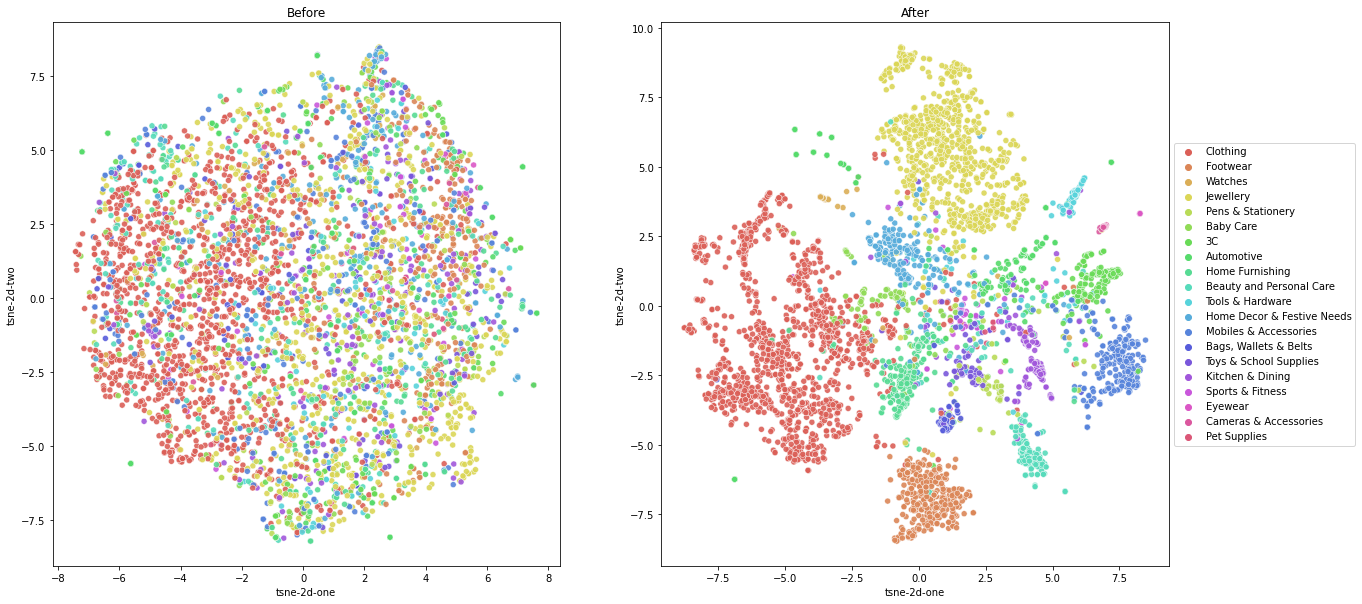

In [36]:
plt.figure(figsize=(20,10))
index = np.random.randint(0,len(x_embeddings),5000)
plt.subplot(1,2,1)
before=sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",
                hue="labels",
                data=x_embeddings_before_train.iloc[index,:],
                palette="hls",
                legend=False,
                alpha=0.9)
plt.title('Before')


plt.subplot(1,2,2)
after=sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",
                hue="labels",
                data=x_embeddings.iloc[index,:],
                palette="hls",
                # legend="brief",
                alpha=0.9)
after.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('After')

## PCA(不採用)


In [7]:
x_embeddings = pd.read_csv(path+"csv_files/embeddings_after.csv", encoding="unicode_escape")
x_embeddings_before_train= pd.read_csv(path+"csv_files/embeddings_before_train.csv", encoding="unicode_escape")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


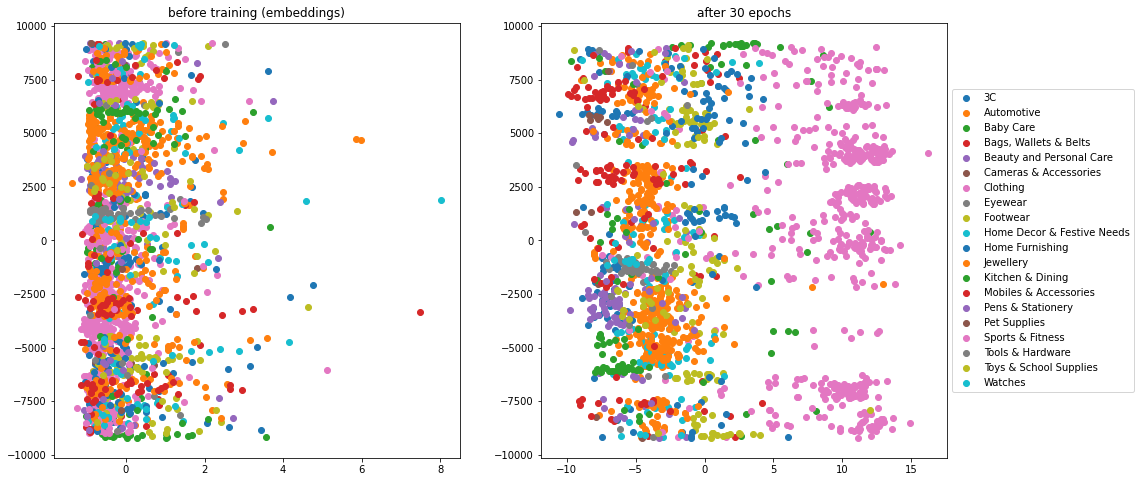

In [56]:
# Visualizing the effect of embeddings -> using PCA!

dict_embeddings = {}
dict_gray = {}
test_class_labels = np.unique(np.array( table_2['labels']))

pca = PCA(n_components=no_of_components)
decomposed_embeddings = pca.fit_transform(x_embeddings)

decomposed_gray = pca.fit_transform(x_embeddings_before_train)
    
fig = plt.figure(figsize=(16, 8))
for label in test_class_labels:
        decomposed_embeddings_class = decomposed_embeddings[ table_2['labels']== label]
        decomposed_gray_class = decomposed_gray[ table_2['labels']== label]

        plt.subplot(1,2,1)
        plt.scatter(decomposed_gray_class[::step,1], decomposed_gray_class[::step,0],label=str(label))
        plt.title('before training (embeddings)')
        

        plt.subplot(1,2,2)
        plt.scatter(decomposed_embeddings_class[::step, 1], decomposed_embeddings_class[::step, 0], label=str(label))
        plt.title('after %d epochs' % epochs)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.show()

## Get_recommender

In [8]:
from sklearn.metrics.pairwise import pairwise_distances

# Calcule DIstance Matriz
cosine_sim = 1-pairwise_distances(x_embeddings, metric='cosine')
cosine_sim[:4, :4]

array([[1.        , 0.33151473, 0.20332482, 0.94706563],
       [0.33151473, 1.        , 0.40989903, 0.30418439],
       [0.20332482, 0.40989903, 1.        , 0.21458127],
       [0.94706563, 0.30418439, 0.21458127, 1.        ]])

In [ ]:
indices = pd.Series(range(len(x)))
indices

# Function that get movie recommendations based on the cosine similarity score of movie genres
def get_recommender(idx, top_n = 5):
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    
    return indices.iloc[idx_rec].index, idx_sim

get_recommender(29, top_n = 5)

In [ ]:
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(figures[title])
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional

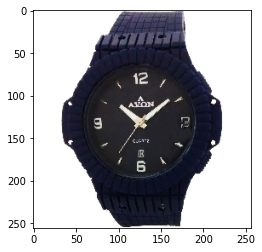

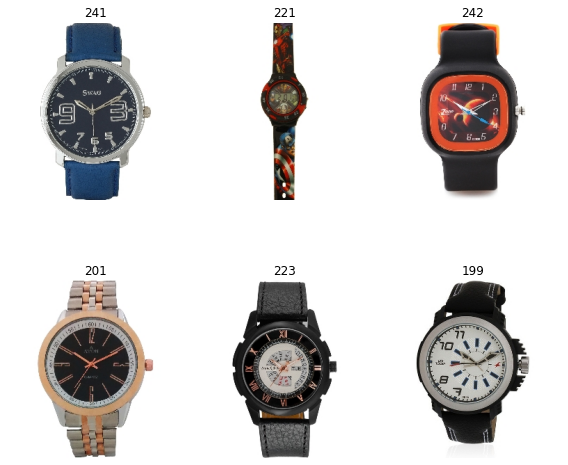

In [23]:
# Idx Item to Recommender
idx_ref =238

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, top_n = 6)

# Plot
#===================
 
plt.imshow(cv2.cvtColor(np.array(x[idx_ref],dtype="uint8"),cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {str(i): cv2.cvtColor(np.array(x[i],dtype="uint8"),cv2.COLOR_BGR2RGB) for i in idx_rec}

# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)